In [45]:
import pandas as pd
import seaborn as sns
from numpy import cov
from scipy.stats import pearsonr



In [46]:
search_term_perf = pd.read_csv("./git_ignored_data/ssd_search_terms_alias_city.csv")

search_term_perf = search_term_perf[search_term_perf['Conversions'] > 1]
search_term_perf = search_term_perf[search_term_perf['Search term'].str.contains("attorney|lawyer|near me", regex=True)]
search_term_perf.head()

,Unnamed: 0,Search term,Match type,Added/Excluded,Ad group,Currency code,Cost,Clicks,Impr.,CTR,Avg. CPC,Impr. (Abs. Top) %,Impr. (Top) %,Conversions,MQL Cost,Sent CPA,Sent Conversions,Campaign
210,210,disability attorney near me,Phrase match (close variant),Added,Lawyer - PM/EM,USD,114.88,16,354,0.0452,7.18,0.1949,0.678,4.0,28.72,0,0.0,LT MBL SSD1
1635,1635,disability social security lawyer,Exact match (close variant),None,Lawyer (Soc. Sec.) - PM/EM,USD,5.63,1,13,0.0769,5.63,0.0769,0.7692,2.0,2.82,0,0.0,LT MBL SSD1
2009,2009,disability attorney,Exact match (close variant),None,Lawyer Near Me - PM/EM,USD,93.28,10,182,0.0549,9.33,0.2967,0.7857,3.0,31.09,0,0.0,LT MBL SSD1
2186,2186,social security lawyers,Exact match (close variant),None,Lawyer (Soc. Sec.) - PM/EM,USD,344.40,34,553,0.0615,10.13,0.2694,0.7631,8.0,43.05,0,0.0,LT MBL SSD1
2464,2464,social security attorney near me,Exact match (close variant),None,Lawyer (SSD) - PM/EM,USD,216.97,34,257,0.1323,6.38,0.3268,0.8794,4.0,54.24,0,0.0,LT MBL SSD1


In [47]:
corr, _ = pearsonr(search_term_perf['Conversions'], search_term_perf['Sent Conversions'])
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.711


<AxesSubplot:xlabel='Conversions', ylabel='Sent Conversions'>

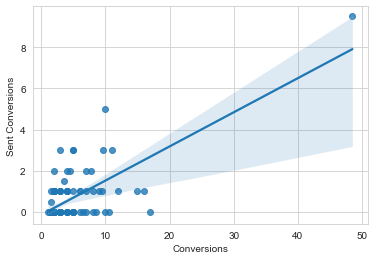

In [48]:
sns.regplot(x=search_term_perf["Conversions"], y=search_term_perf["Sent Conversions"])